# Introduction to Neural Network classification with Tensorflow

## Creating data to view and fit

In [72]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy, SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
# make 1000 samples
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [5]:
# Make dataframe of features and labels
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

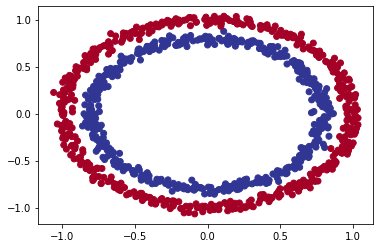

In [7]:
# Visualize with a plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

## Steps in modelling

In [9]:
# set random seed
tf.random.set_seed(42)
# create or import a model
model_1 = Sequential()
model_1.add(Dense(1))

# compile the model
model_1.compile(loss=BinaryCrossentropy(), optimizer=SGD(),
                metrics=['accuracy'])

# fit the model
model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 8ms/step - loss: 5.9053 - accuracy: 0.4720
Epoch 2/5
32/32 [==============================] - 0s 8ms/step - loss: 4.7796 - accuracy: 0.4800
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 4.0657 - accuracy: 0.4860
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 3.4047 - accuracy: 0.5120
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 1.7996 - accuracy: 0.5070


In [10]:
# improve the model
model_1.fit(X,y, epochs=200, verbose=0)

In [11]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [12]:
# add an extra layer
# set random seed
tf.random.set_seed(42)
# create or import a model
model_2 = Sequential()
model_2.add(Dense(1))
model_2.add(Dense(1))

# compile the model
model_2.compile(loss=BinaryCrossentropy(), optimizer=SGD(),
                metrics=['accuracy'])

# fit the model
model_2.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 3.5775 - accuracy: 0.5040
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8425 - accuracy: 0.4990
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7441 - accuracy: 0.4990
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7233 - accuracy: 0.4970
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7133 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7074 - accuracy: 0.4940
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7047 - accuracy: 0.4980
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7021 - accuracy: 0.4890
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7002 - accuracy: 0.4900
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.4990
Epoch 11/

In [13]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933305263519287, 0.5]

In [14]:
# set random seed
tf.random.set_seed(42)
# create or import a model
model_3 = Sequential()
model_3.add(Dense(100, input_shape=(None, 1)))
model_3.add(Dense(10))
model_3.add(Dense(1))

# compile the model
model_3.compile(loss=BinaryCrossentropy(), optimizer=Adam(),
                metrics=['accuracy'])

# fit the model
model_3.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 2.1644 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8604 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7745 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7303 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7066 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4844
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4997
Epoch 11/

In [15]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934912204742432, 0.5]

To visualize our model's predictions, let's create a function

In [16]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


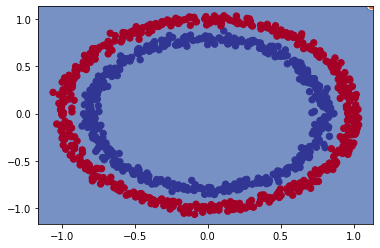

In [17]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

Looks like our model is trying to draw a straight line through the data.

What's wrong with doing this?

The main issue is our data isn't separable by a straight line.

In a regression problem, our model might work. In fact, let's try it.

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
#             y_reg_train,
#             epochs=100)

In [19]:
# set random seed
tf.random.set_seed(42)
# create or import a model
model_3 = Sequential()
model_3.add(Dense(100, input_shape=(None, 1)))
model_3.add(Dense(10))
model_3.add(Dense(1))

# compile the model
model_3.compile(loss=tf.keras.losses.mae, optimizer=Adam(),
                metrics=['mae'])

# fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 373.0703 - mae: 373.0703
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 298.9093 - mae: 298.9093
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 267.1613 - mae: 267.1613
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 254.1465 - mae: 254.1465
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 261.6051 - mae: 261.6051
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 262.8489 - mae: 262.8489
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 255.6656 - mae: 255.6656
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 252.9094 - mae: 252.9094
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 258.5405 - mae: 258.5405
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 257.3466 - mae: 257.3466
Epoch 11/100
5/5 [=====================

2/2 [==============================] - 0s 5ms/step


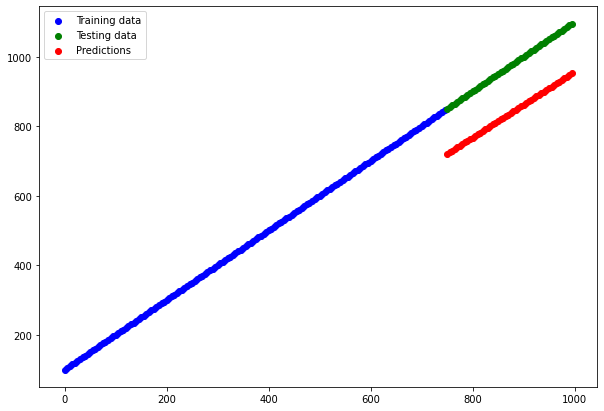

In [20]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

## The missing piece: Non-linearity

In [21]:
# set random seed
tf.random.set_seed(42)
# create or import a model
model_4 = Sequential()
model_4.add(Dense(1, activation=tf.keras.activations.linear))

# compile the model
model_4.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

# fit the model
model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2805 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1237 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0230 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9810 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9576 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8899 - accuracy: 0.4970
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7898 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7107 - accuracy: 0.4690
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5715 - accuracy: 0.4500
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5520 - accuracy: 0.4500
Epoch 11/

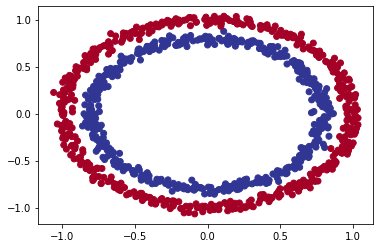

In [22]:
# Visualize with a plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


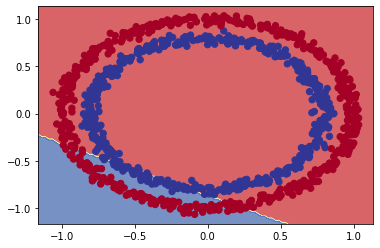

In [23]:
# Check out the predictions our model is making
plot_decision_boundary(model_4, X, y)

In [24]:
# set random seed
tf.random.set_seed(42)
# create or import a model
model_5 = Sequential()
model_5.add(Dense(1, activation='relu'))

# compile the model
model_5.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

# fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.3949 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3930 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3855 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3726 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3800 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 6.3792 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3789 - accuracy: 0.4870
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3786 - accuracy: 0.4870
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3784 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3708 - accuracy: 0.4870
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


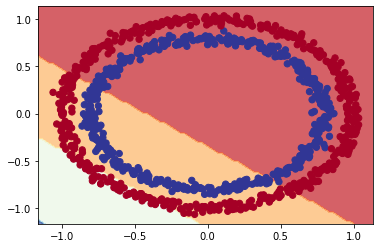

In [25]:
plot_decision_boundary(model_5, X, y)

In [26]:
# set random seed
tf.random.set_seed(42)
# create or import a model
model_6 = Sequential()
model_6.add(Dense(4, activation='relu'))
model_6.add(Dense(4, activation='relu'))
model_6.add(Dense(1, activation='sigmoid'))

# compile the model
model_6.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

# fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.4960
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.5020
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.5060
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5090
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.5270
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.5270
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.5300
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.5420
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5410
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5340
Epoch 11/

In [27]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.8530


[0.49584242701530457, 0.8529999852180481]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


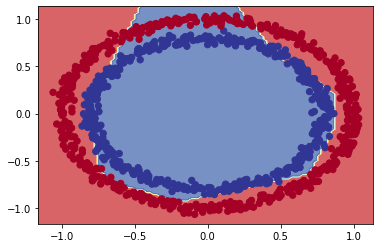

In [28]:
plot_decision_boundary(model_6, X, y)

In [29]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

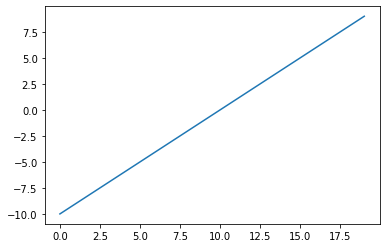

In [30]:
# Visualize our toy tensor
plt.plot(A);

In [31]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

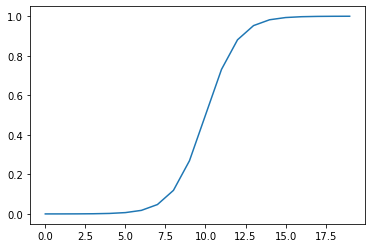

In [32]:
plt.plot(sigmoid(A))

In [33]:
# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

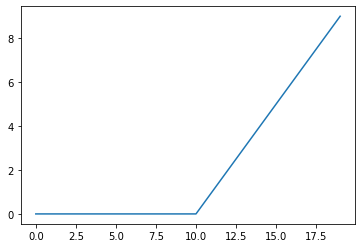

In [34]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [35]:
# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [36]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification model

In [37]:
# How many examples are in the whole dataset?
len(X)

1000

In [38]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2))

In [39]:
# set random seed
tf.random.set_seed(42)
# create or import a model
model_7 = Sequential()
model_7.add(Dense(4, activation='relu'))
model_7.add(Dense(4, activation='relu'))
model_7.add(Dense(1, activation='sigmoid'))

# compile the model
model_7.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(learning_rate=0.01),
                metrics=['accuracy'])

# fit the model
history = model_7.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6984 - accuracy: 0.4825
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5300
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5688
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6100
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6634 - accuracy: 0.6687
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6513 - accuracy: 0.6288
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.7775
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6091 - accuracy: 0.7500
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5763 - accuracy: 0.7875
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5324 - accuracy: 0.8238
Epoch 11/25
25/25 [

In [40]:
# Evaluate our model on the test set
loss, accuracy = model_7.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 0.9950
Model loss on the test set: 0.05430234968662262
Model accuracy on the test set: 99.50%


313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


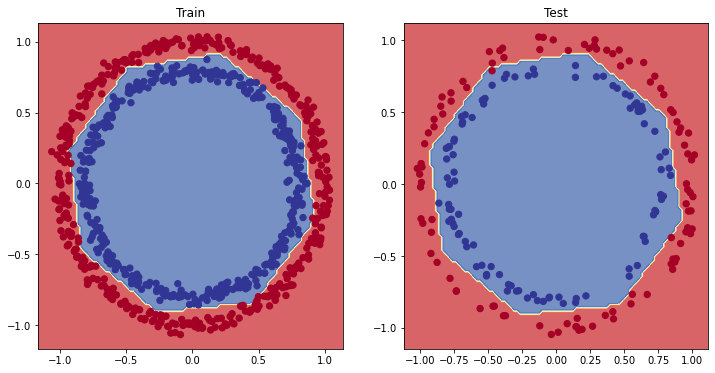

In [41]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_7, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_7, X=X_test, y=y_test)
plt.show()

In [42]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.698413,0.48250
1,0.687361,0.53000
2,0.680349,0.56875
3,0.673136,0.61000
4,0.663378,0.66875
5,0.651274,0.62875
6,0.632285,0.77750
7,0.609071,0.75000
8,0.576254,0.78750
9,0.532411,0.82375


Text(0.5, 1.0, 'Model_7 training curves')

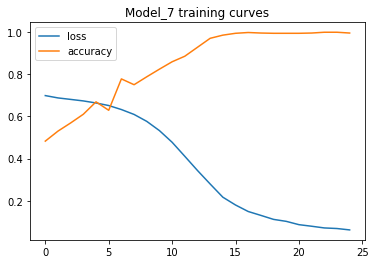

In [43]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_7 training curves")

## Finding the best learning rate

In [44]:
from keras.api._v2.keras import callbacks
# set random seed
tf.random.set_seed(42)
# create or import a model
model_9 = Sequential()
model_9.add(Dense(4, activation='relu'))
model_9.add(Dense(4, activation='relu'))
model_9.add(Dense(1, activation='sigmoid'))

# compile the model
model_9.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

# create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10 ** (epoch/20))

# fit the model
history = model_9.fit(X_train, y_train, epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6973 - accuracy: 0.4963 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.4938 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.4938 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4938 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.4975 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4975 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

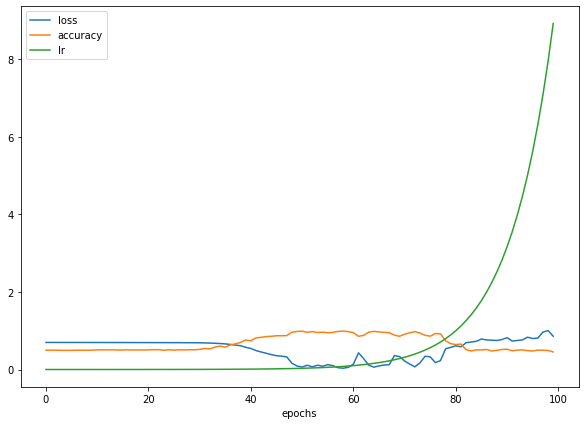

In [45]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

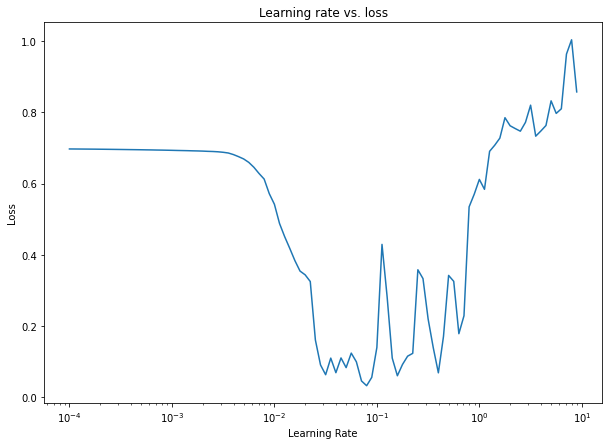

In [46]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [47]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [48]:
# set random seed
tf.random.set_seed(42)
# create or import a model
model_10 = Sequential()
model_10.add(Dense(4, activation='relu'))
model_10.add(Dense(4, activation='relu'))
model_10.add(Dense(1, activation='sigmoid'))

# compile the model
model_10.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(learning_rate=0.02),
                metrics=['accuracy'])

# fit the model
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 7ms/step - loss: 0.6836 - accuracy: 0.5437
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6683 - accuracy: 0.5888
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6439 - accuracy: 0.6463
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 0.5909 - accuracy: 0.8025
Epoch 5/20
25/25 [==============================] - 0s 5ms/step - loss: 0.5058 - accuracy: 0.8537
Epoch 6/20
25/25 [==============================] - 0s 5ms/step - loss: 0.3817 - accuracy: 0.9400
Epoch 7/20
25/25 [==============================] - 0s 5ms/step - loss: 0.2728 - accuracy: 0.9700
Epoch 8/20
25/25 [==============================] - 0s 5ms/step - loss: 0.1982 - accuracy: 0.9737
Epoch 9/20
25/25 [==============================] - 0s 5ms/step - loss: 0.1559 - accuracy: 0.9912
Epoch 10/20
25/25 [==============================] - 0s 8ms/step - loss: 0.1270 - accuracy: 0.9912
Epoch 11/20
25/25 [

In [49]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0398 - accuracy: 0.9900


[0.0398431271314621, 0.9900000095367432]

313/313 [==============================] - 1s 4ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


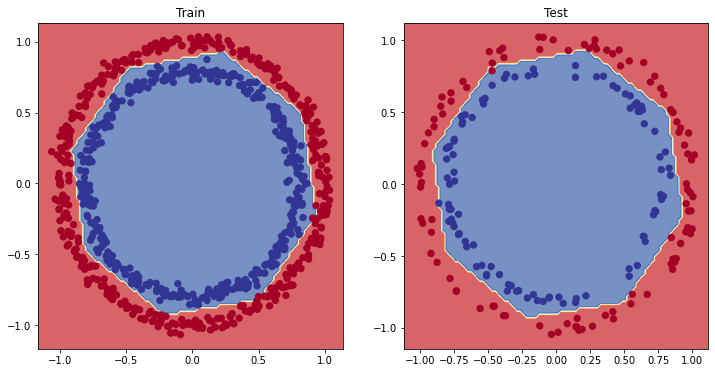

In [50]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

In [51]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9900
Model loss on test set: 0.0398431271314621
Model accuracy on test set: 99.00%


In [52]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [53]:
# View the first 10 predictions
y_preds[:10]

array([[9.7604120e-01],
       [9.7604120e-01],
       [9.7604120e-01],
       [9.7604120e-01],
       [5.7158783e-02],
       [1.2306026e-03],
       [9.0827733e-01],
       [8.6716545e-04],
       [9.7604120e-01],
       [1.7986571e-02]], dtype=float32)

In [54]:
# View the first 10 test labels
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [55]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [56]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  1,  98]])

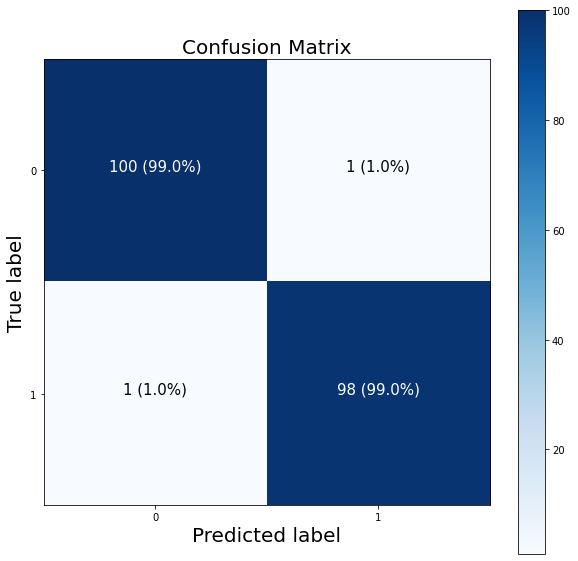

In [57]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [58]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


## Working with a larger example (multiclass classification)

In [59]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [60]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [61]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [62]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

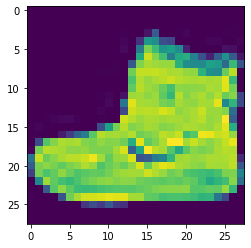

In [64]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [65]:
# Check our samples label
train_labels[7]

2

In [66]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

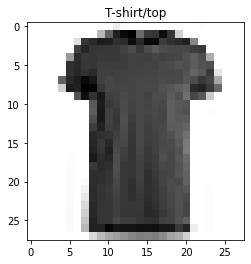

In [70]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

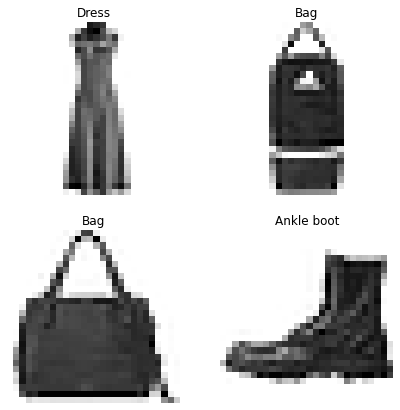

In [71]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [74]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = Sequential()
model_11.add(Flatten(input_shape=(28,28)))
model_11.add(Dense(4, activation='relu'))
model_11.add(Dense(4, activation='relu'))
model_11.add(Dense(10, activation='softmax'))
# compile the model
model_11.compile(loss=SparseCategoricalCrossentropy(),
                 optimizer=Adam(),
                 metrics=['accuracy'])
# fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.3260 - accuracy: 0.0993 - val_loss: 2.2893 - val_accuracy: 0.1106
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2700 - accuracy: 0.1166 - val_loss: 2.2404 - val_accuracy: 0.1351
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2326 - accuracy: 0.1317 - val_loss: 2.2234 - val_accuracy: 0.1367
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1401 - accuracy: 0.1572 - val_loss: 1.8504 - val_accuracy: 0.2138
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7602 - accuracy: 0.2468 - val_loss: 1.7032 - val_accuracy: 0.2767
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6716 - accuracy: 0.2855 - val_loss: 1.6522 - val_accuracy: 0.2797
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6349 - accuracy: 0.2940 - val_loss: 1.6313 - val_accuracy:

In [75]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [77]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [78]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = Sequential()
model_12.add(Flatten(input_shape=(28,28)))
model_12.add(Dense(4, activation='relu'))
model_12.add(Dense(4, activation='relu'))
model_12.add(Dense(10, activation='softmax'))
# compile the model
model_12.compile(loss=SparseCategoricalCrossentropy(),
                 optimizer=Adam(),
                 metrics=['accuracy'])
# fit the model
norm_history = model_12.fit(train_data,
                        train_labels,
                        epochs=10,
                        validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.4167 - accuracy: 0.4465 - val_loss: 1.1208 - val_accuracy: 0.5368
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0288 - accuracy: 0.5695 - val_loss: 0.9908 - val_accuracy: 0.5904
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9249 - accuracy: 0.6218 - val_loss: 0.9050 - val_accuracy: 0.6390
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8392 - accuracy: 0.6676 - val_loss: 0.8389 - val_accuracy: 0.6796
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7771 - accuracy: 0.6913 - val_loss: 0.7976 - val_accuracy: 0.6791
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7486 - accuracy: 0.7069 - val_loss: 0.7933 - val_accuracy: 0.7038
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7138 - accuracy: 0.7410 - val_loss: 0.7510 - val_accuracy:

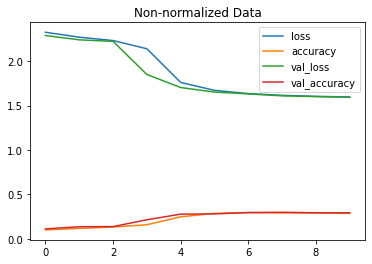

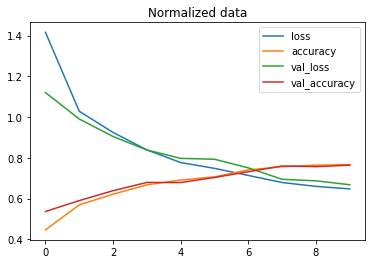

In [79]:
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [80]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = Sequential()
model_13.add(Flatten(input_shape=(28,28)))
model_13.add(Dense(4, activation='relu'))
model_13.add(Dense(4, activation='relu'))
model_13.add(Dense(10, activation='softmax'))
# compile the model
model_13.compile(loss=SparseCategoricalCrossentropy(),
                 optimizer=Adam(),
                 metrics=['accuracy'])
# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model
find_lr_history = model_13.fit(train_data,
                  train_labels,
                  epochs=50,
                  callbacks=[lr_scheduler],
                  validation_data=(test_data, test_labels))

Epoch 1/50
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1305 - accuracy: 0.6040 - val_loss: 0.7401 - val_accuracy: 0.7669 - lr: 0.0010
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6444 - accuracy: 0.7872 - val_loss: 0.6243 - val_accuracy: 0.7879 - lr: 0.0011
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5820 - accuracy: 0.8016 - val_loss: 0.5987 - val_accuracy: 0.7949 - lr: 0.0013
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5594 - accuracy: 0.8081 - val_loss: 0.5918 - val_accuracy: 0.7989 - lr: 0.0014
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5504 - accuracy: 0.8091 - val_loss: 0.5747 - val_accuracy: 0.8056 - lr: 0.0016
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5405 - accuracy: 0.8134 - val_loss: 0.6034 - val_accuracy: 0.7928 - lr: 0.0018
Epoch 7/50
1875/1875 [==============================] - 5s

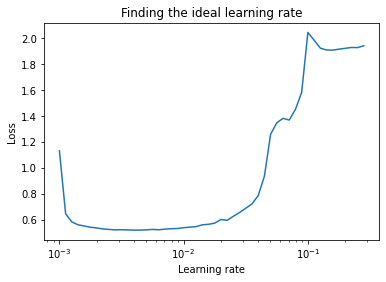

In [81]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(50)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

Let's refit a model using the ideal learning rate.

In [82]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = Sequential()
model_14.add(Flatten(input_shape=(28,28)))
model_14.add(Dense(4, activation='relu'))
model_14.add(Dense(4, activation='relu'))
model_14.add(Dense(10, activation='softmax'))
# compile the model
model_14.compile(loss=SparseCategoricalCrossentropy(),
                 optimizer=Adam(learning_rate=0.001),
                 metrics=['accuracy'])
# fit the model
history = model_14.fit(train_data,
                  train_labels,
                  epochs=20,
                  validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2024 - accuracy: 0.5760 - val_loss: 0.9011 - val_accuracy: 0.6855
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8073 - accuracy: 0.7266 - val_loss: 0.7618 - val_accuracy: 0.7531
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7007 - accuracy: 0.7716 - val_loss: 0.6975 - val_accuracy: 0.7763
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6543 - accuracy: 0.7821 - val_loss: 0.6694 - val_accuracy: 0.7833
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6270 - accuracy: 0.7864 - val_loss: 0.6475 - val_accuracy: 0.7834
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6087 - accuracy: 0.7896 - val_loss: 0.6552 - val_accuracy: 0.7775
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5975 - accuracy: 0.7918 - val_loss: 0.6461 - val_accuracy:

In [83]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [84]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[2.1291102e-09, 4.3575017e-08, 8.2953908e-11, 7.3297565e-06,
        5.2060653e-07, 6.3001162e-01, 1.6716431e-08, 4.3022111e-02,
        1.2085758e-04, 3.2683739e-01],
       [8.6706525e-05, 3.6037718e-14, 8.4969163e-01, 1.5193874e-04,
        9.6987456e-02, 1.5989583e-12, 5.3082131e-02, 3.8172095e-26,
        8.8595286e-08, 3.1491069e-24],
       [9.0654969e-05, 9.8342562e-01, 4.0453338e-07, 2.0320027e-03,
        3.7206033e-07, 1.7311814e-04, 6.5292897e-07, 5.3564632e-05,
        1.2427441e-08, 1.4223589e-02],
       [4.4401771e-05, 9.6771193e-01, 3.3459094e-06, 3.0999903e-02,
        4.6236869e-06, 4.1109754e-05, 6.9970662e-07, 1.5507467e-08,
        1.0206165e-09, 1.1939685e-03],
       [1.8998507e-01, 9.8269738e-06, 2.1889818e-01, 2.2363657e-02,
        4.1859124e-02, 1.8447467e-05, 5.2606302e-01, 1.5923704e-10,
        8.0251257e-04, 3.8038139e-11]], dtype=float32)

In [85]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(5, 'Sandal')

In [86]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([5, 2, 1, 1, 6, 1, 6, 6, 5, 7])

In [88]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=test_labels, y_pred=y_preds)
cm

array([[821,   3,  23,  59,   3,   1,  79,   0,  11,   0],
       [ 18, 926,   1,  51,   1,   0,   2,   0,   1,   0],
       [ 44,   1, 642,  27, 121,   0, 161,   0,   4,   0],
       [ 56,  24,  16, 815,  36,   5,  46,   0,   2,   0],
       [  3,   0,  99,  55, 659,   1, 173,   0,  10,   0],
       [  1,   1,   0,   4,   0, 898,   0,  42,  15,  39],
       [211,   1, 103,  49, 111,   2, 507,   0,  16,   0],
       [  0,   0,   0,   0,   0,  63,   0, 897,   2,  38],
       [  4,   0,   1,   5,   6,  19,  44,   5, 916,   0],
       [  0,   0,   0,   2,   0,  42,   1,  47,   0, 908]])

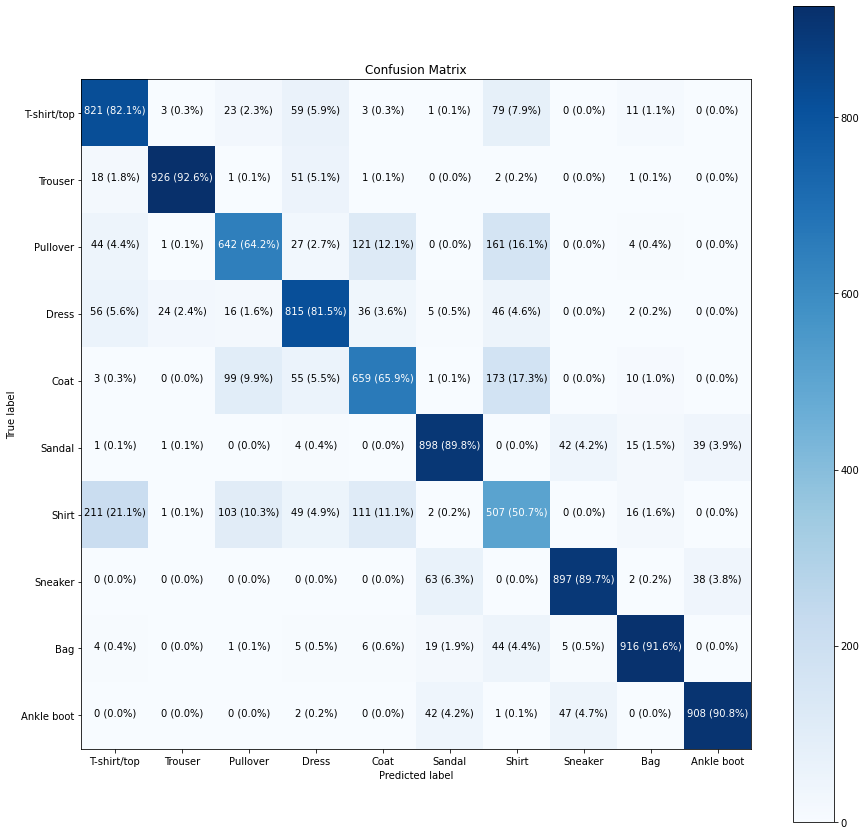

In [89]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

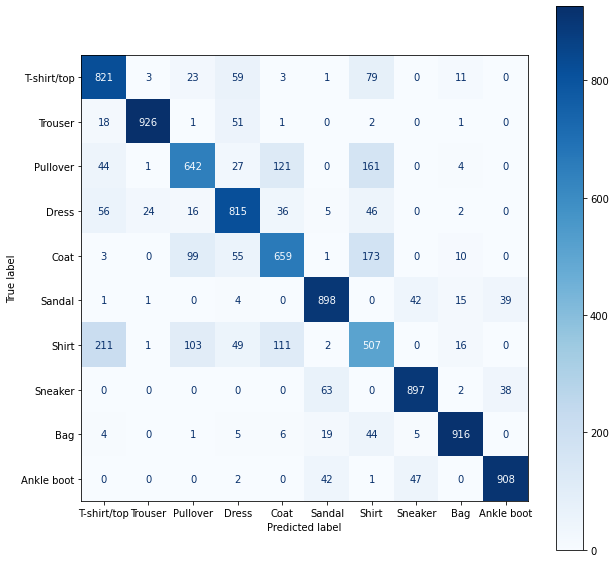

In [101]:
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=class_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap=plt.cm.Blues)

In [95]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 37ms/step


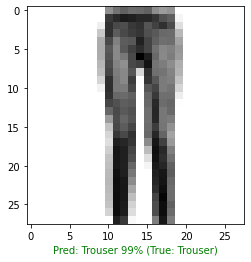

In [97]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

## What patterns is our model learning?

In [102]:
# Find the layers of our most recent model
model_14.layers

In [103]:
# Extract a particular layer
model_14.layers[1]

In [104]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-0.5575265 , -0.36388   ,  0.21703762,  0.66248506],
        [ 0.29506305, -1.0578612 ,  0.0526606 ,  0.404455  ],
        [ 0.70962596, -0.7487658 , -0.8617832 ,  0.5070205 ],
        ...,
        [-0.00424567,  0.1455774 , -0.23427606,  0.9392466 ],
        [-0.7104291 , -0.18777679,  0.55203056,  0.6141602 ],
        [-0.05958077, -0.42350903, -0.0839484 ,  0.70041245]],
       dtype=float32), (784, 4))

In [105]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([-1.577915 ,  1.0167863,  1.1590825,  1.5763874], dtype=float32), (4,))

In [106]:
# Can now calculate the number of paramters in our model
model_14.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


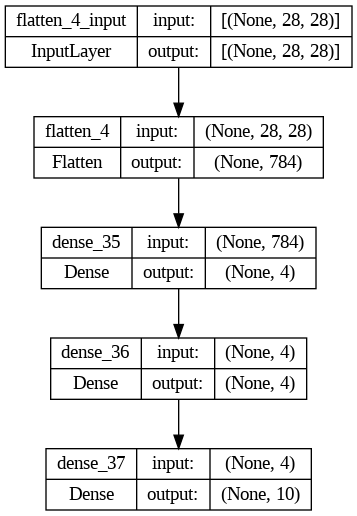

In [107]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

## How a model learns (in brief)
Alright, we've trained a bunch of models, but we've never really discussed what's going on under the hood. So how exactly does a model learn?

A model learns by updating and improving its weight matrices and biases values every epoch (in our case, when we call the fit() fucntion).

It does so by comparing the patterns its learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called backpropagation.

In other words, data and labels pass through a model (forward pass) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (backward pass) and tweaking its weights matrices and bias values to better represent the data.

If all of this sounds confusing (and it's fine if it does, the above is a very succinct description), check out the resources in the extra-curriculum section for more.